<a href="https://colab.research.google.com/github/magicznylukasz/uczenie_maszynowe_w_finansach/blob/main/case1_lz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Przygotowanie danych

## 1.1. Wczytanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## 1.2. Wczytanie danych i analiza

In [2]:
df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)

df.head()

<ipython-input-2-43a712f8940f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Usunięcie kolumn stringowych. Braki w nich mogą niesłusznie sugerować brak oszustwa

In [3]:
for column in list(df):
  if not pd.api.types.is_numeric_dtype(df[column]):
    df.drop(column, axis=1, inplace=True)

In [4]:
df.head()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,1,0,844.26,1093.71,704785.63,721,89,0,40,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,2,3,0,246194.54,2434.02,516729.30,2,10,0,10,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,3,4,0,10219.60,15785.09,397555.90,25,9,0,7,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,4,5,0,36.61,10707.77,382472.42,4598,20,1,7,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


Przejrzenie informacji


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

In [6]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Sprawdzanie oszustw

In [7]:
df["FLAG"].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

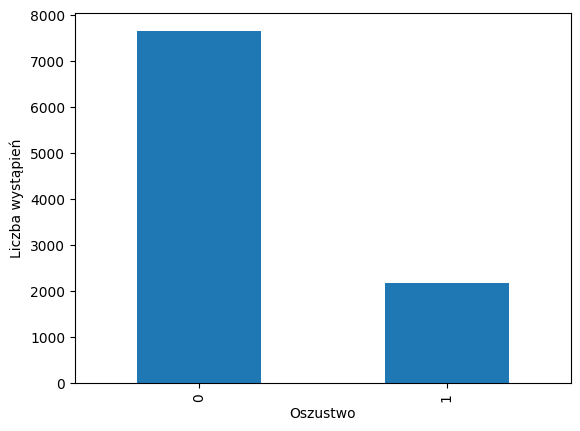

In [8]:
df['FLAG'].value_counts().plot(kind= 'bar')
plt.xlabel("Oszustwo")
plt.ylabel("Liczba wystąpień");

## 1.3. Sprawdzanie i usuwanie braków danych

In [9]:
df.isna().sum()

Unnamed: 0                                                0
Index                                                     0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                            

In [10]:
def show_missing_variables(df):
  missing_cols = [col for col in df.columns if df[col].isna().any()]
  if missing_cols:
    print("Występują braki w następujących zmiennych:")
    print(", ".join(missing_cols))
  else:
    print("Nie ma braków w danych.")

show_missing_variables(df.copy())

Występują braki w następujących zmiennych:
Total ERC20 tnxs, ERC20 total Ether received, ERC20 total ether sent, ERC20 total Ether sent contract, ERC20 uniq sent addr, ERC20 uniq rec addr, ERC20 uniq sent addr.1, ERC20 uniq rec contract addr, ERC20 avg time between sent tnx, ERC20 avg time between rec tnx, ERC20 avg time between rec 2 tnx, ERC20 avg time between contract tnx, ERC20 min val rec, ERC20 max val rec, ERC20 avg val rec, ERC20 min val sent, ERC20 max val sent, ERC20 avg val sent, ERC20 min val sent contract, ERC20 max val sent contract, ERC20 avg val sent contract, ERC20 uniq sent token name, ERC20 uniq rec token name


Występują braki, więc zastępujemy je średnią wartością zmiennej

In [11]:
columns_to_impute = [
    'Total ERC20 tnxs',
    'ERC20 total Ether received',
    'ERC20 total ether sent',
    'ERC20 total Ether sent contract',
    'ERC20 uniq sent addr',
    'ERC20 uniq rec addr',
    'ERC20 uniq sent addr.1',
    'ERC20 uniq rec contract addr',
    'ERC20 avg time between sent tnx',
    'ERC20 avg time between rec tnx',
    'ERC20 avg time between rec 2 tnx',
    'ERC20 avg time between contract tnx',
    'ERC20 min val rec',
    'ERC20 max val rec',
    'ERC20 avg val rec',
    'ERC20 min val sent',
    'ERC20 max val sent',
    'ERC20 avg val sent',
    'ERC20 min val sent contract',
    'ERC20 max val sent contract',
    'ERC20 avg val sent contract',
    'ERC20 uniq sent token name',
    'ERC20 uniq rec token name'
]

for col in columns_to_impute:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [12]:
df.isna().sum()

Unnamed: 0                                              0
Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent

## 1.4. Tworzenie grupy testowej i treningowej

In [13]:
X = df.drop(columns=['FLAG', 'Unnamed: 0', 'Index']) #usunięcie dwóch pierwszych zmiennych, które są indeksem
y = df['FLAG']


podzial = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in podzial.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [14]:
y_train.value_counts()

0    6129
1    1743
Name: FLAG, dtype: int64

In [15]:
y_test.value_counts()

0    1533
1     436
Name: FLAG, dtype: int64

## 1.5. Oversampling

In [16]:
oversampler = RandomOverSampler(random_state=42)

X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)

df_oversamp = pd.concat([y_oversamp, X_oversamp], axis=1)

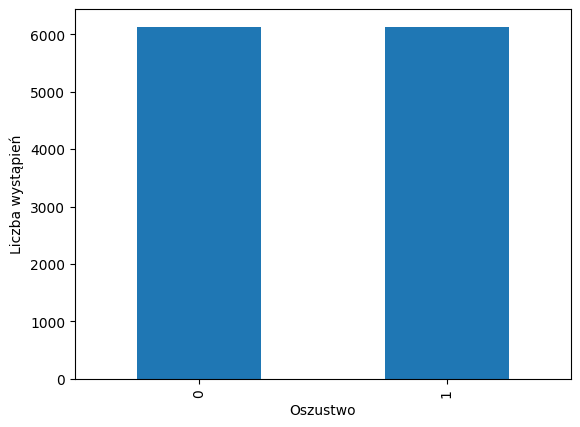

In [17]:
df_oversamp['FLAG'].value_counts().plot(kind= 'bar')
plt.xlabel("Oszustwo")
plt.ylabel("Liczba wystąpień");

## 1.6. Usuwanie wartości odstających


In [18]:
isolation_forest = IsolationForest(random_state=42)

kolumna_flag = 0
X_train_bez_flag = df_oversamp.drop(df_oversamp.columns[kolumna_flag], axis=1)

outlier_pred = isolation_forest.fit_predict(X_train_bez_flag)

X_train = df_oversamp[outlier_pred == 1]

In [19]:
X_train = df_oversamp.drop(columns='FLAG')
y_train = df_oversamp['FLAG']

## 1.7. Standaryzacja

In [20]:
std_scaler = StandardScaler()
standaryzacja = std_scaler.fit_transform(X_train)
standaryzacja_test = std_scaler.fit_transform(X_test)

In [21]:
df_standaryzowane = pd.DataFrame(standaryzacja, columns=X.columns)
df_standaryzowane_test = pd.DataFrame(standaryzacja_test, columns=X.columns)

## 1.8. Wykorzystanie metody Recursive Feature Elimination do wybrania najbardziej wpływowych zmiennych

In [22]:
best_features = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=10)
best_features.fit(df_standaryzowane, y_train)
selected_features = X.columns[best_features.support_]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 10
Selected features : ['Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Received Tnx', 'Unique Received From Addresses', 'Total ERC20 tnxs', 'ERC20 total Ether sent contract', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'ERC20 avg val sent', 'ERC20 uniq rec token name']


In [23]:
X_test_RFE = df_standaryzowane_test[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

X_train_RFE = df_standaryzowane[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

# 2. Prognozowanie

## 2.1. Regresja liniowa

Najpierw sprawdzimy wszystkie zmienne

In [24]:
regresja_liniowa = LogisticRegression(max_iter=500, random_state=50)
regresja_liniowa.fit(df_standaryzowane, y_train)

y_pred = regresja_liniowa.predict(df_standaryzowane_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8207


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1533
           1       0.56      0.83      0.67       436

    accuracy                           0.82      1969
   macro avg       0.75      0.82      0.77      1969
weighted avg       0.86      0.82      0.83      1969



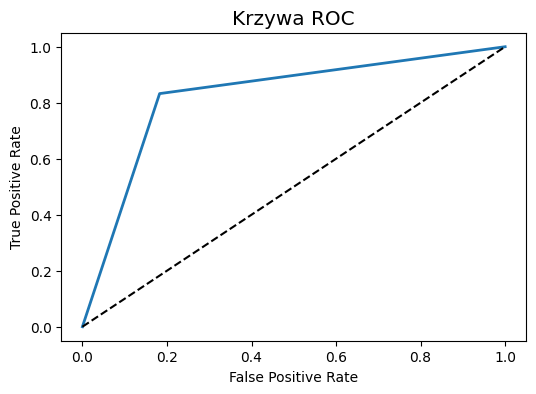

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

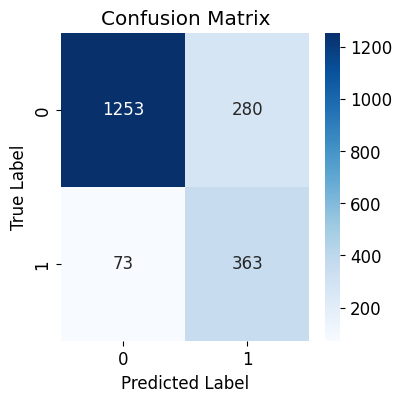

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Teraz sprawdzimy dla 10 wybranych

In [28]:
regresja_liniowa = LogisticRegression(max_iter=500, random_state=50)
regresja_liniowa.fit(X_train_RFE, y_train)

y_pred_2 = regresja_liniowa.predict(X_test_RFE)

accuracy = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8507


In [29]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1533
           1       0.88      0.38      0.53       436

    accuracy                           0.85      1969
   macro avg       0.86      0.68      0.72      1969
weighted avg       0.85      0.85      0.83      1969



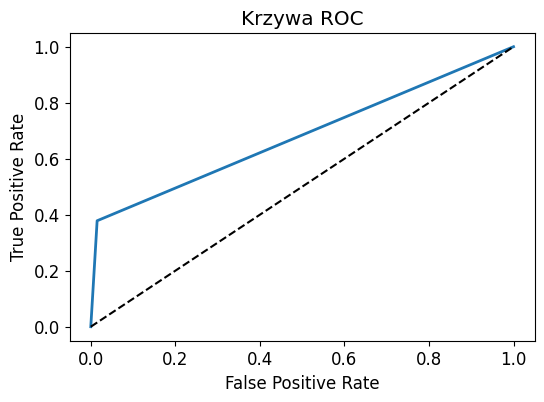

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

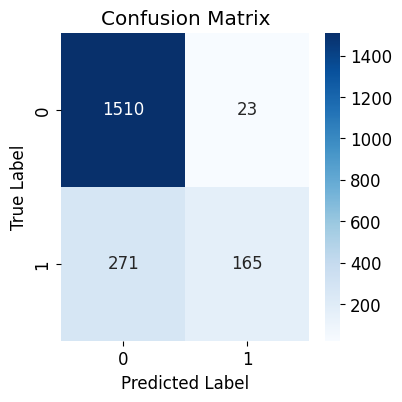

In [31]:
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 2.2. Metoda KNN

Dla wszystkich

In [48]:
k_range = range(1, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_standaryzowane, y_train)
    y_pred_3 = knn.predict(df_standaryzowane_test)

    accuracy = accuracy_score(y_test, y_pred_3)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best k value: 2
Best accuracy: 0.9325


In [33]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1533
           1       0.79      0.90      0.84       436

    accuracy                           0.92      1969
   macro avg       0.88      0.91      0.89      1969
weighted avg       0.93      0.92      0.93      1969



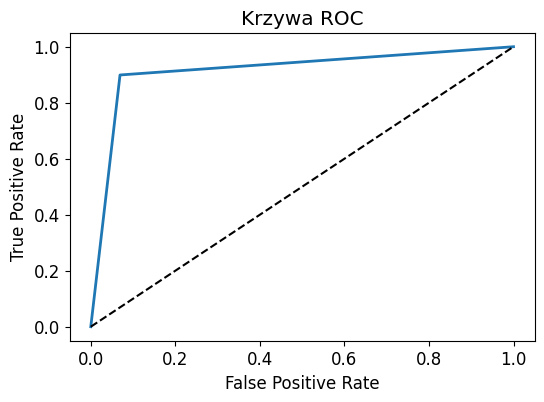

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_3)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

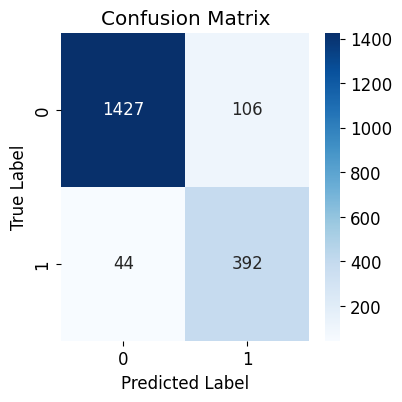

In [35]:
cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Dla 10 wybranych

In [36]:
k_range = range(1, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_RFE, y_train)
    y_pred_4 = knn.predict(X_test_RFE)

    accuracy = accuracy_score(y_test, y_pred_4)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best k value: 2
Best accuracy: 0.9243


In [37]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1533
           1       0.76      0.87      0.81       436

    accuracy                           0.91      1969
   macro avg       0.86      0.90      0.88      1969
weighted avg       0.92      0.91      0.91      1969



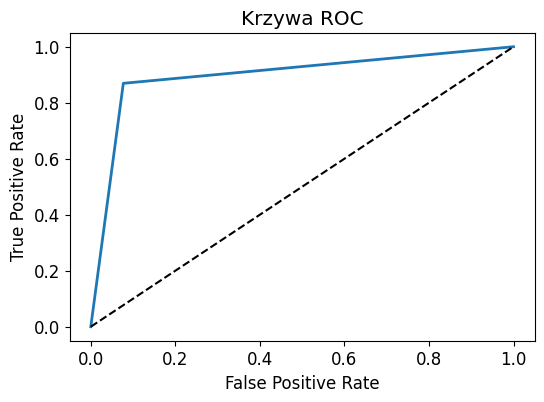

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

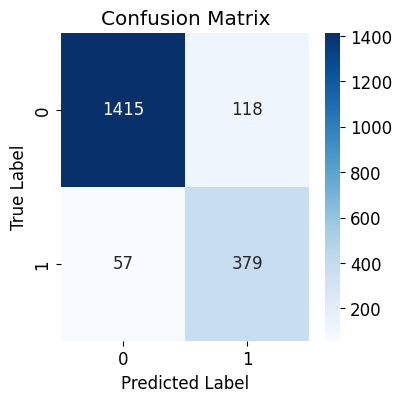

In [39]:
cm = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 2.3. Metoda wektorów nośnych

In [40]:
X_test_RFE_2 = X_test[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

X_train_RFE_2 = X_train[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

In [41]:
svc_svm=SVC(C=100.0)

svc_svm.fit(X_train_RFE_2,y_train)

y_pred_5=svc_svm.predict(X_test_RFE_2)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Accuracy: 0.8568


In [42]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1533
           1       0.99      0.36      0.53       436

    accuracy                           0.86      1969
   macro avg       0.92      0.68      0.72      1969
weighted avg       0.88      0.86      0.83      1969



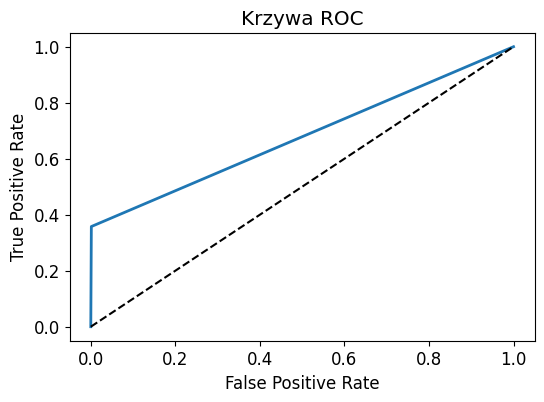

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_5)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

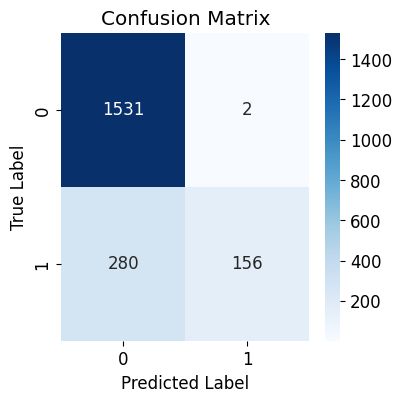

In [44]:
cm = confusion_matrix(y_test, y_pred_5)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Podsumowanie

In [49]:
accuracy_1 = (accuracy_score(y_test, y_pred))
accuracy_2 = (accuracy_score(y_test, y_pred_2))
accuracy_3 = (accuracy_score(y_test, y_pred_3))
accuracy_4 = (accuracy_score(y_test, y_pred_4))
accuracy_5 = (accuracy_score(y_test, y_pred_5))

models = ["Regresja liniowa - wszystko", "Regresja liniowa - 10 wybranych", "Metoda K-najbliższych sąsiadów - all", "Metoda K-najbliższych sąsiadów - 10", "Metoda wektorów nośnych - 10 wybranych"]
accuracy_values = [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5]
accuracy_dict = {"Model": models, "Accuracy": accuracy_values}

df_accuracy = pd.DataFrame(accuracy_dict)

print(df_accuracy.to_string(index=False))


                                 Model  Accuracy
           Regresja liniowa - wszystko  0.820721
       Regresja liniowa - 10 wybranych  0.850686
  Metoda K-najbliższych sąsiadów - all  0.923819
   Metoda K-najbliższych sąsiadów - 10  0.911122
Metoda wektorów nośnych - 10 wybranych  0.856780


Najlepsza metoda to KNN, ponieważ cechuje ją największa dokładność